In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [199]:
# Формируем список из файла
raw_sleep_records = []
with open('sleep-export.csv') as f:
    sleep_record = []
    # Начало новой записи
    sleep_record.append(f.readline()
                            .strip()
                            .replace('"', '')
                            .split(',')
                       )
    for line in f:
        row = (line \
            .strip()
            .replace('"', '')
            .split(',')
        )
        if row[0] == 'Id': # Начало следующей записи
            raw_sleep_records.append(sleep_record)
            sleep_record = []
            sleep_record.append(row)
        else:
            sleep_record.append(row)

In [232]:
# Формируем события сна
sleep_events = []
for record in raw_sleep_records:
    events = []
    for i in range(len(record[0])):
        if record[0][i] == 'Event':
            row = record[1][i].split('-')[:2]
            events.append([row[0], row[1][:-3]])
    sleep_events.append(events)

In [294]:
# Сколько минут сна надо для засчитывания фазы
deep_time = 1
# Максимальное время между двумя фазами для объединения
deep_pause = 60
sleep_data = {}
for day in sleep_events:
    start = day[0][1]
    deep_start = None
    for event in day:
        if event[0] == 'DEEP_START' and deep_start is None:
            deep_start = event[1]
        elif event[0] == 'DEEP_END':
            deep_end = event[1]
            if (int(deep_end) - int(deep_start)) / 60 >= deep_time:
                sleep_data[datetime.fromtimestamp(int(start))] = (int(deep_end) - int(start)) / 60
                break
        elif event[0] == 'DEEP_START':
            if (int(event[1]) - int(deep_end))  / 60 > deep_pause:
                deep_start = event[1]

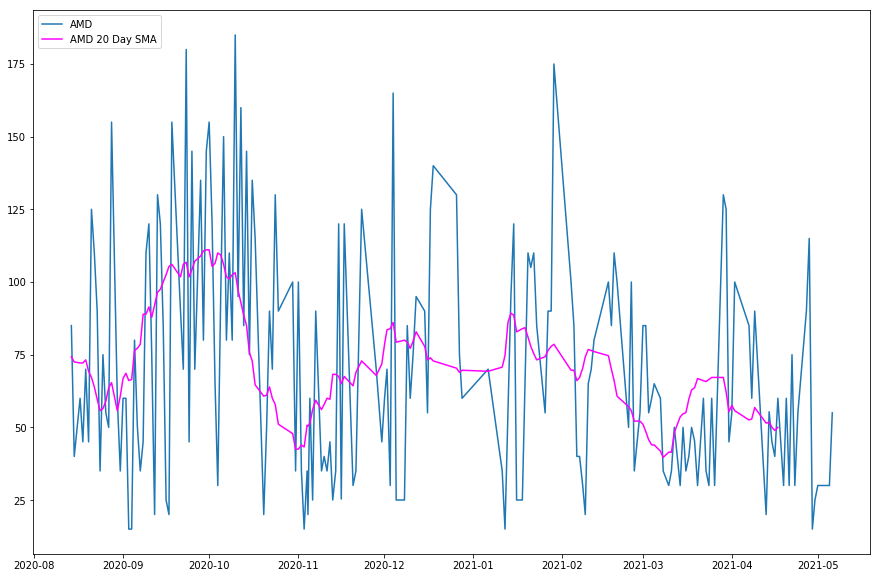

In [301]:
%matplotlib inline

df = pd.DataFrame.from_dict(sleep_data, orient='index', columns=['sleep_time'])

fig, ax = plt.subplots()

rolling_mean = df.sleep_time.rolling(window=14).mean()

plt.plot(df.index, df.sleep_time, label='AMD')
plt.plot(df.index, rolling_mean, label='AMD 20 Day SMA', color='magenta')
plt.legend(loc='upper left')


fig.set_figwidth(15)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()